In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [17]:
df=pd.read_csv('delivery_time.csv')

In [18]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [20]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

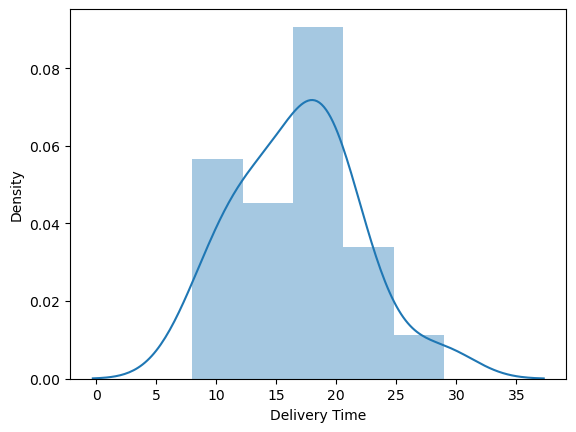

In [21]:
sns.distplot(df['Delivery Time'])
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Sorting Time', ylabel='Density'>

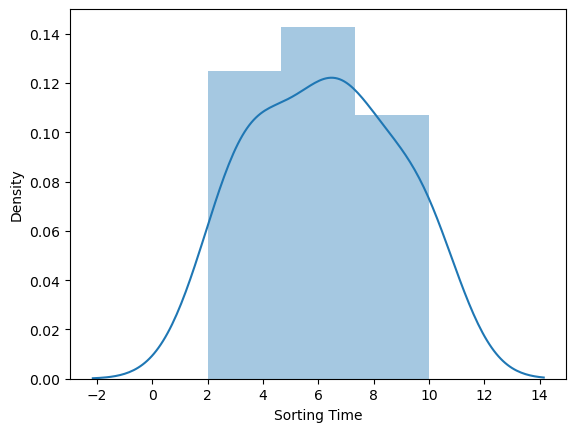

In [22]:
sns.distplot(df['Sorting Time'])

In [23]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [43]:
#Renaming Columns
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [44]:
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [31]:
model=smf.ols("delivery_time~sorting_time",data=df).fit()

In [32]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [33]:
# Finding tvalues and pvalues
model.tvalues,model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [34]:
#finding Rsquared Values
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [35]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [36]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [40]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])

In [41]:
data_pred

,sorting_time
0,5
1,8


In [42]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64